In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pathlib
from matplotlib import cm

from queso.utils.io import IO

In [32]:
def load_data(io, ns, ks):
    data = {}
    for n in ns:
        _d = {}
        for k in ks:
            fid = io.path.joinpath(f'n={n}_k={k}.pkl')
            if fid.is_file():
                _df = io.load_dataframe(fid.stem)
            else:
                _df = None

            _d[k] = _df
        data[n] = _d


    return data

io = IO(folder=r"pure_qfi_barren_plateau")
ns = [1, 2, 3, 4, 5, 6, 7, 8]
ks = [1, 2, 3, 4, 5, 6, 7, 8]
data = load_data(io, ns, ks)

19/02/2023, 22:03:30 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/pure_qfi_barren_plateau/n=1_k=1.pkl successfully.
19/02/2023, 22:03:30 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/pure_qfi_barren_plateau/n=1_k=2.pkl successfully.
19/02/2023, 22:03:30 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/pure_qfi_barren_plateau/n=1_k=3.pkl successfully.
19/02/2023, 22:03:30 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/pure_qfi_barren_plateau/n=1_k=4.pkl successfully.
19/02/2023, 22:03:30 | Loaded from /Users/benjamin/Library/CloudStorage/OneDrive-UniversityofWaterloo/Desktop/1 - Projects/Quantum Intelligence Lab/queso/data/pure_

[(0.46572465933050433, 0.04599148120581072), (1.3023670337808348, 0.39779929889093407), (1.9048296357525998, 1.504947926505465), (3.1196777475177573, 3.4126664423187414), (5.47091636708999, 4.50490693700752), (6.41013132819908, 8.287472932881526), (7.080301625248408, 13.567188707169862), (9.025689921025773, 15.048445689343094)]
[(0.535968643861207, 0.048764086641693266), (0.9249211497205492, 0.4269481828542921), (2.081538828207972, 1.4180920986511947), (3.227311611926927, 2.2920211142593), (3.906777112328574, 4.053969316907562), (5.248441691280852, 5.647176383190285), (5.94718439083528, 7.944656599711379), (6.954543768013751, 8.971012254459742)]
[(0.5121552889265283, 0.05321328345295525), (1.0278322712953931, 0.34726093592427626), (2.047901966070259, 1.2321580372902177), (3.049556412302418, 1.8780248471492933), (3.838994298313404, 2.9742869343539247), (4.714112077632643, 3.601965190404544), (5.456418576447879, 4.525292951841544), (6.0227171364230045, 4.460478859847914)]
[(0.41071951436

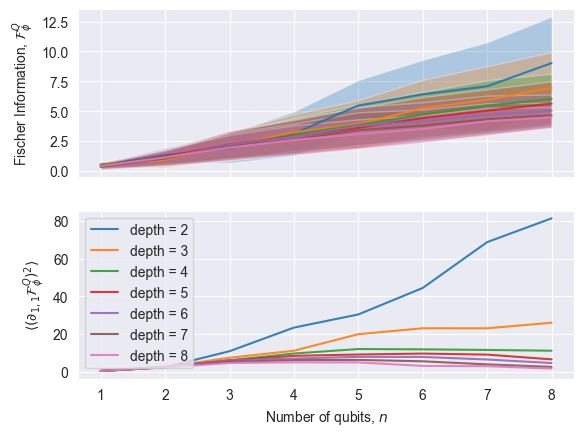

In [52]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
colors = sns.color_palette()

ks = [2, 3, 4, 5, 6, 7, 8]
for i, k in enumerate(ks):
    fi_mean, fi_var = [], []
    grads_avg_variance = []
    for n in ns:
        df = data[n][k]

        fi_mean.append(
            np.mean(df["fi_vals"][0])
        )
        fi_var.append(
            np.var(df["fi_vals"][0])
        )

        fi_grad_vals = df["fi_grad_vals"][0]
        grad_var = np.var(fi_grad_vals, axis=0)

        grads_avg_variance.append(grad_var[0, 0])
        # grads_avg_variance.append(np.mean(grad_var))

    print(list(zip(fi_mean, fi_var)))

    axs[0].plot(ns, fi_mean, alpha=0.9)
    axs[0].fill_between(ns, fi_mean - np.sqrt(fi_var), fi_mean + np.sqrt(fi_var), alpha=0.3)
    axs[0].set(ylabel="Fischer Information, $\mathcal{F}^Q_\phi$")

    axs[1].plot(ns, grads_avg_variance, label=f"depth = {k}", alpha=0.9)
    axs[1].set(ylabel=r"$\langle (\partial_{1, 1} \mathcal{F}^Q_\phi)^2 \rangle$")

    axs[-1].legend()
    axs[-1].set(xlabel="Number of qubits, $n$")
plt.show()

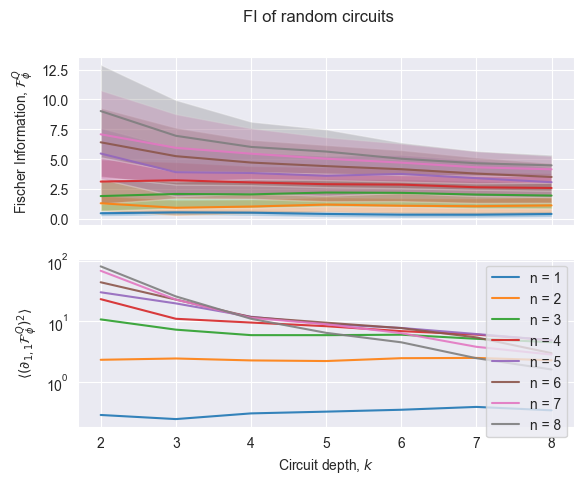

In [64]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
colors = sns.color_palette()

ks = [2, 3, 4, 5, 6, 7, 8]
ns = [1, 2, 3, 4, 5, 6, 7, 8]
for i, n in enumerate(ns):
    fi_mean, fi_var = [], []
    grads_avg_variance = []
    for k in ks:
        df = data[n][k]

        fi_mean.append(
            np.mean(df["fi_vals"][0])
        )
        fi_var.append(
            np.var(df["fi_vals"][0])
        )

        fi_grad_vals = df["fi_grad_vals"][0]
        grad_var = np.var(fi_grad_vals, axis=0)

        grads_avg_variance.append(grad_var[0, 0])
        # grads_avg_variance.append(np.mean(grad_var))

    axs[0].plot(ks, fi_mean, alpha=0.9)
    axs[0].fill_between(ks, fi_mean - np.sqrt(fi_var), fi_mean + np.sqrt(fi_var), alpha=0.3)
    axs[0].set(ylabel="Fischer Information, $\mathcal{F}^Q_\phi$")

    axs[1].plot(ks, grads_avg_variance, label=f"n = {n}", alpha=0.9)
    axs[1].set(ylabel=r"$\langle (\partial_{1, 1} \mathcal{F}^Q_\phi)^2 \rangle$")
    axs[1].set(yscale="log")
    axs[-1].legend()
    axs[-1].set(xlabel="Circuit depth, $k$")

fig.suptitle("FI of random circuits")
plt.show()